# Chapter 9 Introduction to Artificial Neural Networks

Learning about the history of 'deep learning' in regard to neural networks. These are mathematical models that are inspired by hte biological processes of the human brain where neurons work together to interpret signals. 

The main basis of this is the **perceptron** which acts as a neuron-like structure, modifying an input and producing an output. The real deep learning is stacking these in multiple levels of 'hidden' layers between the input and output layers, these are Multi Layer Perceptron's (MLP)s.

## Regression MLPs

You will use one output neuron per dimension of your desired predicitons. In the below example we are recreating the california housing price prediction task and thus are only outputting one value so will use a single output neuron. 

In [28]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
housing = fetch_openml(name="house_prices", as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
print(f"x_train: {x_train.head()}")
print(f"y_train: {y_train.head()}")

x_train:         Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
1023  1024         120       RL  ...    2008        WD        Normal
810    811          20       RL  ...    2006        WD        Normal
1384  1385          50       RL  ...    2009        WD        Normal
626    627          20       RL  ...    2007        WD        Normal
813    814          20       RL  ...    2007       COD        Normal

[5 rows x 80 columns]
y_train: 1023    191000
810     181000
1384    105000
626     139900
813     157900
Name: SalePrice, dtype: int64


In [30]:
print(x_train.dtypes)
print(x_train.select_dtypes(include=['object']).head())

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object
     MSZoning Street Alley LotShape  ...  Fence MiscFeature SaleType SaleCondition
1023       RL   Pave   NaN      Reg  ...    NaN         NaN       WD        Normal
810        RL   Pave   NaN      Reg  ...  GdPrv         NaN       WD        Normal
1384       RL   Pave   NaN      Reg  ...  MnPrv         NaN       WD        Normal
626        RL   Pave   NaN      IR1  ...   GdWo        Shed       WD        Normal
813        RL   Pave   NaN      Reg  ...    NaN        Shed      COD        Normal

[5 rows x 43 columns]


The `MLPRegressor` model will have 3 hidden layers of 50 neurons each.

The first hidden layer's input size = number of rows in its weights matrix

The ouptut layer's output size (number of columns in its weights matrix) will adjust automaticaly to the dimensionality of the inputs and targets when training starts.

In [31]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], early_stopping=True,
                       verbose=True, random_state=42)

Remember that `early_stopping=True` stops the training when no improvement in the RMS Error has been detected in 10 (default) consecutive epochs.

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = make_pipeline(preprocessor, mlp_reg)
pipeline.fit(x_train, y_train)

Iteration 1, loss = 19713162719.22870255
Validation score: -4.693458
Iteration 2, loss = 19712930402.31414795
Validation score: -4.693370
Iteration 3, loss = 19712564910.82591248
Validation score: -4.693226
Iteration 4, loss = 19711962786.54067230
Validation score: -4.692985
Iteration 5, loss = 19710953700.14043427
Validation score: -4.692596
Iteration 6, loss = 19709345349.02417374
Validation score: -4.691988
Iteration 7, loss = 19706893456.98846054
Validation score: -4.691070
Iteration 8, loss = 19703274011.62723160
Validation score: -4.689734
Iteration 9, loss = 19697897818.99206543
Validation score: -4.687835
Iteration 10, loss = 19690402700.93539810
Validation score: -4.685208
Iteration 11, loss = 19680270917.64151764
Validation score: -4.681637
Iteration 12, loss = 19666602481.38837433
Validation score: -4.676881
Iteration 13, loss = 19648559221.71979523
Validation score: -4.670660
Iteration 14, loss = 19624673233.61290741
Validation score: -4.662674
Iteration 15, loss = 19594390

/home/smr/repos/hands-on-ml-notes/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,steps,"[('columntransformer', ...), ('mlpregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


QUESTION: why the `StandardScaler()`?

In [33]:
mlp_reg.best_validation_score_

0.8428420709725686

#### RMSE on the test set:

In [35]:
y_pred = pipeline.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

33132.413921842504

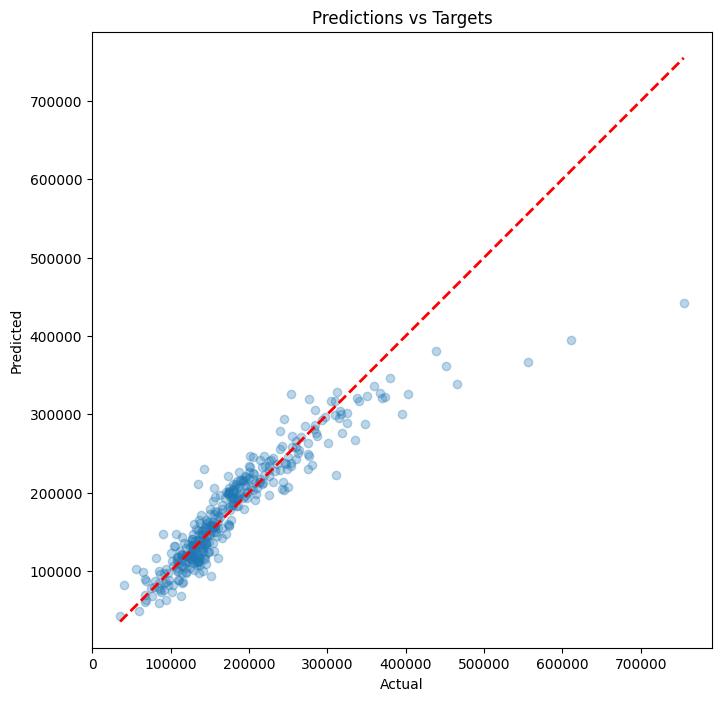

In [36]:
import matplotlib.pyplot as plt

y_pred = pipeline.predict(x_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predictions vs Targets')
plt.axis('equal')
plt.show()

## Classification MLPs

Single output neuron for binary classification, or one output per label/class in multilabel binary and multiclass classification.

In [37]:
from sklearn.neural_network import MLPClassifier

#### Fashion MNST

Dataset for classifying fashion items.

In [41]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(name="Fashion-MNIST", as_frame=False)
targets = fashion_mnist.target.astype(int)

Grab the first 60,000 images for training.

In [46]:
x_train, y_train = fashion_mnist.data[:60_000], targets[:60_000]
x_test, y_test = fashion_mnist.data[60_000:], targets[60_000:]

Images is a 1D integer array containing 784 pixels from 0 to 255. Using `plt.imshow()` allows us to display the image.

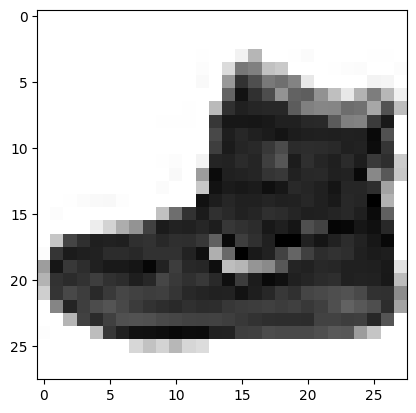

In [47]:
import matplotlib.pyplot as plt

x_sample = x_train[0].reshape(28, 28)
plt.imshow(x_sample, cmap="binary")
plt.show()

The labels of the data are numeric at the y value so we need to add class names for us that align with the positions.

In [50]:
y_train[0]

np.int64(9)

In [48]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [49]:
class_names[y_train[0]]

'Ankle boot'

Training the classification MLP is similar to before. We create the classifier from the `MLPClassifier` with our parameters, then create a pipeline with the `MinMaxScaler` since images have white space around them, this is more ideal for images.

The `score()` function allows us to get the accuracy of the model after training on the validation set `x_test` and `y_test`

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

mlp_clf = MLPClassifier(hidden_layer_sizes=[300, 100],
                        verbose=True,
                        early_stopping=True,
                        random_state=42,)
pipeline = make_pipeline(MinMaxScaler(), mlp_clf)
pipeline.fit(x_train, y_train)
accuracy = pipeline.score(x_test, y_test)

Iteration 1, loss = 0.55394420
Validation score: 0.854833
Iteration 2, loss = 0.39017365
Validation score: 0.867500
Iteration 3, loss = 0.34572472
Validation score: 0.877500
Iteration 4, loss = 0.31541926
Validation score: 0.881167
Iteration 5, loss = 0.29351007
Validation score: 0.887167
Iteration 6, loss = 0.28459028
Validation score: 0.889167
Iteration 7, loss = 0.26775210
Validation score: 0.885500
Iteration 8, loss = 0.25610516
Validation score: 0.886667
Iteration 9, loss = 0.24488907
Validation score: 0.893167
Iteration 10, loss = 0.23915583
Validation score: 0.888500
Iteration 11, loss = 0.22290961
Validation score: 0.897167
Iteration 12, loss = 0.21925185
Validation score: 0.889667
Iteration 13, loss = 0.21249406
Validation score: 0.892167
Iteration 14, loss = 0.20374069
Validation score: 0.891333
Iteration 15, loss = 0.19557455
Validation score: 0.893833
Iteration 16, loss = 0.19099949
Validation score: 0.893667
Iteration 17, loss = 0.18445775
Validation score: 0.890333
Iterat

In [53]:
x_new = x_test[:15]
mlp_clf.predict(x_new)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4])

In [54]:
y_proba = mlp_clf.predict_proba(x_new)
y_proba[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Hyperparameter Tuning Guidelines

Neural networks are very flexible and thus have many parameters to tune: number of layers, neurons, the type of activation function, weight initialization logic, type of optimizer to use, it's learning rate, and the batch size amonght others.

#### Number of Hidden Layers

A deep neural network, with more hidden layers can do more with less data due to the increased *parameter eficiency* compared to shallow ones, using exponentially fewer neurons. This gain is due to the backpropagation allowing for reuse of learned features.

**transfer learning** is the process of re-using the lower layers of previous networks to kickstart training by initializing the weights and biases of the new layer to that of the previous, rather than some randomized values. This way learning does not start from scratch.

#### Number of Neurons per Hidden Layer

The number of neurons in input and output layers is determined by the type of input and output, for example classifying 28 x 28 pixel = 784 inputs into one of 10 categories output neurons. 

Too few neurons and the model will not have the computational ability needed to model complex relationships, too many and training may take more time and data.

> In general increasing the number of layers is more valuable than number of neurons per layer

#### Learning Rate

In general, the optimal learning rate is about half of the maximum learning rate.

Starting with a very slow learning rate and multiplying it by a constant value over iterations the loss can be calculated as a function of the learning rate. The point just before the learning rate starts to climb is usually near optimal.

> Scikit-Learn has a `warm_start` hyperparameter for MLP's, when `True` we can use `partial_fit()` to update the learning rate at each iteration.

#### Batch Size

This impacts performance due to hardware acceleration of parallel processing of GPUs, bounded by the available *VRAM*.

There seams to be some debat on how big to go.. 